In [1]:
import pandas as pd

df = pd.read_csv("AB_NYC_2019.csv")

print(df.shape)
df.head()

(14884, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [2]:
df = df.drop(columns=["host_id",
                      "host_name",
                      "last_review",
                      "reviews_per_month"])

print(df.shape)
df.head()

(14884, 12)


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,6.0,365.0
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,1.0,0.0


In [3]:
df = df[["id",
         "name",
         "neighbourhood_group",
         "neighbourhood",
         "latitude",
         "longitude",
         "room_type",
         "minimum_nights",
         "number_of_reviews",
         "calculated_host_listings_count",
         "availability_365",
         "price"]]

print(df.shape)
df.head()

(14884, 12)


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,1.0,9.0,6.0,365.0,149.0
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1.0,45.0,2.0,355.0,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,3.0,0.0,1.0,365.0,150.0
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1.0,270.0,1.0,194.0,89.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10.0,9.0,1.0,0.0,80.0


In [4]:
# NANs
df.isnull().sum()

id                                 0
name                              12
neighbourhood_group                1
neighbourhood                      1
latitude                           1
longitude                          1
room_type                          1
minimum_nights                     1
number_of_reviews                  1
calculated_host_listings_count     1
availability_365                   1
price                              1
dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


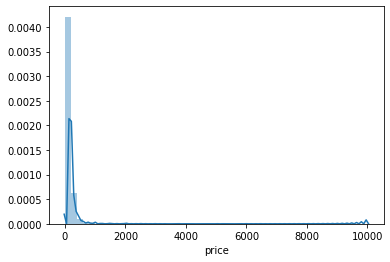

In [5]:
import seaborn as sns
%matplotlib inline

# DistPlot -- Price
sns.distplot(df["price"], bins=50);

##Data Manipulation & Preprocessing

Given that the above graph is extremely skewed to the right,
we will be conveting the price to log(price) in order to compensate

In [6]:
# Since log(0) = -inf, we will remove the zeroes from the graph.

# Shrinking DF
df = df[df["price"] > 0]

# CHECK:
print(df.shape)
df.head()

(14883, 12)


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,1.0,9.0,6.0,365.0,149.0
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1.0,45.0,2.0,355.0,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,3.0,0.0,1.0,365.0,150.0
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1.0,270.0,1.0,194.0,89.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10.0,9.0,1.0,0.0,80.0


In [7]:
import numpy as np

df["log_price"] = np.log(df.price.values)

print(df.shape)
df.head()

(14883, 13)


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price,log_price
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,1.0,9.0,6.0,365.0,149.0,5.003946
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1.0,45.0,2.0,355.0,225.0,5.416100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,3.0,0.0,1.0,365.0,150.0,5.010635
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1.0,270.0,1.0,194.0,89.0,4.488636
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10.0,9.0,1.0,0.0,80.0,4.382027


In [8]:
df.log_price.describe()

count    14883.000000
mean         4.777399
std          0.651525
min          2.302585
25%          4.317488
50%          4.762174
75%          5.170484
max          9.210340
Name: log_price, dtype: float64

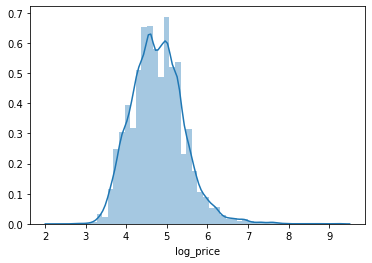

In [9]:
#DistPlot - log_price

# This distribution is clearly far more
# normal than the previous one was.
sns.distplot(df["log_price"], bins=50);

In [10]:
df.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price,log_price
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,1.0,9.0,6.0,365.0,149.0,5.003946
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1.0,45.0,2.0,355.0,225.0,5.416100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,3.0,0.0,1.0,365.0,150.0,5.010635
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1.0,270.0,1.0,194.0,89.0,4.488636
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10.0,9.0,1.0,0.0,80.0,4.382027


In [11]:
# Shuffling the DataFrame
from sklearn.utils import shuffle

df_shuffled = shuffle(df, random_state=84)
df_shuffled = df_shuffled.reset_index(drop=True)
df_shuffled.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price,log_price
0,8183563,"Quiet, Clean, Beautiful East Village Loft",Manhattan,East Village,40.73178,-73.98842,Entire home/apt,2.0,48.0,1.0,211.0,250.0,5.521461
1,2793740,East Village loft; authentic NY.,Manhattan,East Village,40.72266,-73.98337,Private room,3.0,0.0,1.0,365.0,250.0,5.521461
2,2071464,Brooklyn garden 2 bedroom,Brooklyn,Boerum Hill,40.68630,-73.98572,Entire home/apt,5.0,34.0,3.0,333.0,400.0,5.991465
3,9861323,Cozy 10th St. Park Slope 1bdr apt,Brooklyn,Park Slope,40.66854,-73.98482,Entire home/apt,3.0,71.0,3.0,200.0,120.0,4.787492
4,10962,"Lovely room 2 & garden; Best area, Legal rental",Brooklyn,South Slope,40.66869,-73.98780,Private room,4.0,168.0,3.0,340.0,89.0,4.488636


In [12]:
# Encoding prior to train_test_split could
# potentially save us a headache down the road.

# Features and Target
target = "log_price"
features = ["neighbourhood_group",
            "neighbourhood",
            "latitude",
            "longitude",
            "room_type",
            "minimum_nights",
            "number_of_reviews",
            "calculated_host_listings_count",
            "availability_365"]

X = df_shuffled[features]
y = df_shuffled[target]

X.shape, y.shape

((14883, 9), (14883,))

###Preprocessing

In [13]:
X.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Manhattan,East Village,40.73178,-73.98842,Entire home/apt,2.0,48.0,1.0,211.0
1,Manhattan,East Village,40.72266,-73.98337,Private room,3.0,0.0,1.0,365.0
2,Brooklyn,Boerum Hill,40.68630,-73.98572,Entire home/apt,5.0,34.0,3.0,333.0
3,Brooklyn,Park Slope,40.66854,-73.98482,Entire home/apt,3.0,71.0,3.0,200.0
4,Brooklyn,South Slope,40.66869,-73.98780,Private room,4.0,168.0,3.0,340.0


In [14]:
X.room_type.value_counts(normalize=True)

Entire home/apt    0.569643
Private room       0.415978
Shared room        0.014379
Name: room_type, dtype: float64

In [15]:
# We will manually encode room_type,
# then apply ordinal encoding to the
# neighbourhood_group and neighborhood columns

X_encoded = X.replace({"room_type" : {"Shared room" : 0, "Private room" : 1, "Entire home/apt" : 2}})

X_encoded.room_type.value_counts(normalize=True)

2    0.569643
1    0.415978
0    0.014379
Name: room_type, dtype: float64

In [16]:
X_encoded.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Manhattan,East Village,40.73178,-73.98842,2,2.0,48.0,1.0,211.0
1,Manhattan,East Village,40.72266,-73.98337,1,3.0,0.0,1.0,365.0
2,Brooklyn,Boerum Hill,40.68630,-73.98572,2,5.0,34.0,3.0,333.0
3,Brooklyn,Park Slope,40.66854,-73.98482,2,3.0,71.0,3.0,200.0
4,Brooklyn,South Slope,40.66869,-73.98780,1,4.0,168.0,3.0,340.0


In [17]:
!pip install category_encoders

     |████████████████████████████████| 81kB 2.6MB/s 


In [18]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

prep_pipeline = make_pipeline(
    OrdinalEncoder(),
    StandardScaler()
)

X_prep = prep_pipeline.fit_transform(X_encoded)
(type(X_prep), X_prep.shape)

(numpy.ndarray, (14883, 9))

In [19]:
X_train = X_prep[:int(len(y) * 0.8)]
X_test = X_prep[int(len(y) * 0.8):]

y_train = y[:int(len(y) * 0.8)]
y_test = y[int(len(y) * 0.8):]

print(X_train.shape, y_train.shape)
X_test.shape, y_train.shape

(11906, 9) (11906,)


((2977, 9), (11906,))

In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

# Reporting Metrics
mse = mean_squared_error(y_train, train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, train_pred)
r2 = r2_score(y_train, train_pred)

print("Training Metrics")
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2:', r2, "\n")

mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("---" * 4)

print("\nTest Metrics")
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2:', r2)

[15:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Metrics
Mean Absolute Error: 0.3077480805855692
Mean Squared Error: 0.18301726103599208
Root Mean Squared Error: 0.42780516714503586
R^2: 0.5750707416161871 

------------

Test Metrics
Mean Absolute Error: 0.30569961212015156
Mean Squared Error: 0.18406356777970398
Root Mean Squared Error: 0.42902630196726166
R^2: 0.5392429591352124


In [26]:
# Pickling our best model

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [31]:
import pickle

xgb_string = pickle.dumps(xgb)
xgb_string

b'\x80\x03cxgboost.sklearn\nXGBRegressor\nq\x00)\x81q\x01}q\x02(X\t\x00\x00\x00max_depthq\x03K\x03X\r\x00\x00\x00learning_rateq\x04G?\xb9\x99\x99\x99\x99\x99\x9aX\x0c\x00\x00\x00n_estimatorsq\x05KdX\t\x00\x00\x00verbosityq\x06K\x01X\x06\x00\x00\x00silentq\x07NX\t\x00\x00\x00objectiveq\x08X\n\x00\x00\x00reg:linearq\tX\x07\x00\x00\x00boosterq\nX\x06\x00\x00\x00gbtreeq\x0bX\x05\x00\x00\x00gammaq\x0cK\x00X\x10\x00\x00\x00min_child_weightq\rK\x01X\x0e\x00\x00\x00max_delta_stepq\x0eK\x00X\t\x00\x00\x00subsampleq\x0fK\x01X\x10\x00\x00\x00colsample_bytreeq\x10K\x01X\x11\x00\x00\x00colsample_bylevelq\x11K\x01X\x10\x00\x00\x00colsample_bynodeq\x12K\x01X\t\x00\x00\x00reg_alphaq\x13K\x00X\n\x00\x00\x00reg_lambdaq\x14K\x01X\x10\x00\x00\x00scale_pos_weightq\x15K\x01X\n\x00\x00\x00base_scoreq\x16G?\xe0\x00\x00\x00\x00\x00\x00X\x07\x00\x00\x00missingq\x17G\x7f\xf8\x00\x00\x00\x00\x00\x00X\x06\x00\x00\x00kwargsq\x18}q\x19X\x08\x00\x00\x00_Boosterq\x1acxgboost.core\nBooster\nq\x1b)\x81q\x1c}q\x1d(X\r\x0

In [33]:
with open('model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

In [21]:
!pip install eli5

     |████████████████████████████████| 112kB 3.4MB/s 


In [22]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb).fit(X_train, y_train)
eli5.show_weights(perm)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight,Feature
0.6016 ± 0.0160,x4
0.1610 ± 0.0052,x3
0.0860 ± 0.0039,x8
0.0725 ± 0.0041,x2
0.0511 ± 0.0029,x5
0.0314 ± 0.0013,x6
0.0179 ± 0.0009,x7
0.0124 ± 0.0017,x1
0.0031 ± 0.0005,x0


In [23]:
importances = [features[4],
               features[3],
               features[2],
               features[8],
               features[5],
               features[6],
               features[7],
               features[1],
               features[0]]

importances

['room_type',
 'longitude',
 'latitude',
 'availability_365',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'neighbourhood',
 'neighbourhood_group']

##Neural Networks

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                    Dense(16, input_dim=9, activation="sigmoid"),
                    Dense(16, activation="sigmoid"),
                    Dense(1)
])

model.compile(loss="mean_absolute_error", optimizer="adam")
model.fit(x=X_train,
          y=y_train,
          epochs=50,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/50
1223/1223 [==============================] - 3s 2ms/step - loss: 1.0636 - val_loss: 0.3761
Epoch 2/50
1223/1223 [==============================] - 3s 2ms/step - loss: 0.3672 - val_loss: 0.3601
Epoch 3/50
1223/1223 [==============================] - 3s 2ms/step - loss: 0.3558 - val_loss: 0.3535
Epoch 4/50
1223/1223 [==============================] - 3s 2ms/step - loss: 0.3511 - val_loss: 0.3508
Epoch 5/50
 971/1223 [======================>.......] - ETA: 0s - loss: 0.3484

###Hyperparameter tuning

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

# Defining Function
def create_model(layers=2, nodes=16, activation_type="relu", dropout=True):
    '''
    Creates a model instance with the specified attributes
    '''
    # Instantiate Model
    model = Sequential()
    
    # Input Layer
    model.add(Dense(9, input_dim=9, activation=activation_type))
    
    # Hidden Layers
    for i in range(layers):
      model.add(Dense(nodes, activation=activation_type))
      if dropout == True:
        model.add(Dropout(0.2))
    
    # Output Layer
    model.add(Dense(1))
    
    # Compile model
    model.compile(loss=["mae", "mse"],
                  optimizer="adam",
                  metrics=["mae", "mse"])
    
    return model

# Creating Classifier Model
model = KerasRegressor(build_fn=create_model, verbose=0)

# Parameters
param_grid = {'layers': [2],
              'nodes': [16],
              'batch_size': [2, 4, 8, 16, 32],
              'activation_type': ['sigmoid']}

# RandomizedSearchCV
search = RandomizedSearchCV(estimator=model,
                            param_distributions=param_grid,
                            n_jobs=-1,
                            cv=5)

# Search Results
search_result = search.fit(X_train, y_train)

# Report Results
def reporting(search_results):
  print(f'Best {search_results.best_score_} using {search_results.best_params_}')
  means = search_results.cv_results_["mean_test_score"]
  stds = search_results.cv_results_["std_test_score"]
  params = search_results.cv_results_["params"]
  for mean, stdev, param in zip(means, stds, params):
    print(f"Mean :{mean}, Stdev:{stds}, with:{param}")

reporting(search_result)